In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from scipy.stats import shapiro, kstest, probplot
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.graphics.gofplots import qqplot

### Carregar e visualizar dados 

In [2]:
# Carrregar dados de um CSV

df_fazenda = pd.read_csv('./datasets/dados_de_irrigacao.csv')

In [3]:
df_fazenda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 3 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Horas de Irrigação        299 non-null    int64  
 1   Área Irrigada             299 non-null    int64  
 2   Área Irrigada por Ângulo  299 non-null    float64
dtypes: float64(1), int64(2)
memory usage: 7.1 KB


In [4]:
df_fazenda.head(5)

,Horas de Irrigação,Área Irrigada,Área Irrigada por Ângulo
0,1,100,66.666667
1,2,200,133.333333
2,3,300,200.000000
3,4,400,266.666667
4,5,500,333.333333


### Analise exploratoria de dados EDA

In [5]:
df_fazenda.describe()

,Horas de Irrigação,Área Irrigada,Área Irrigada por Ângulo
count,299.000000,299.000000,299.000000
mean,150.000000,15000.000000,10000.000000
std,86.458082,8645.808233,5763.872155
min,1.000000,100.000000,66.666667
25%,75.500000,7550.000000,5033.333333
50%,150.000000,15000.000000,10000.000000
75%,224.500000,22450.000000,14966.666667
max,299.000000,29900.000000,19933.333333


<Axes: xlabel='Horas de Irrigação', ylabel='Área Irrigada por Ângulo'>

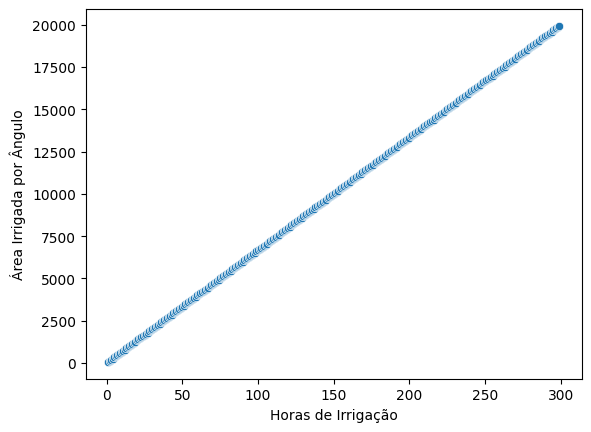

In [10]:
sns.scatterplot(data=df_fazenda, x='Horas de Irrigação', y='Área Irrigada por Ângulo')

<Axes: >

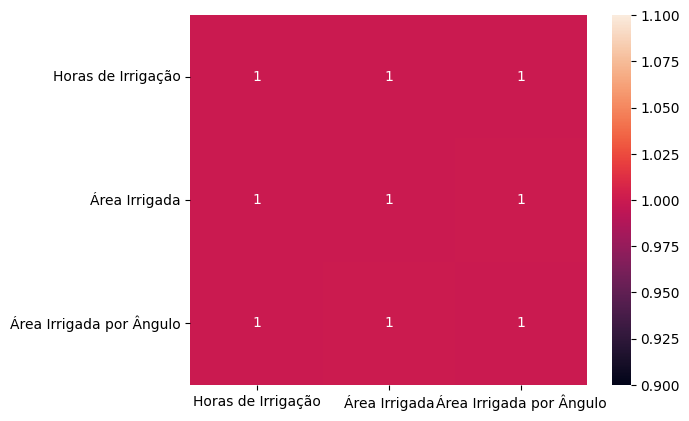

In [8]:
sns.heatmap(df_fazenda.corr('pearson'), annot=True)

<Axes: >

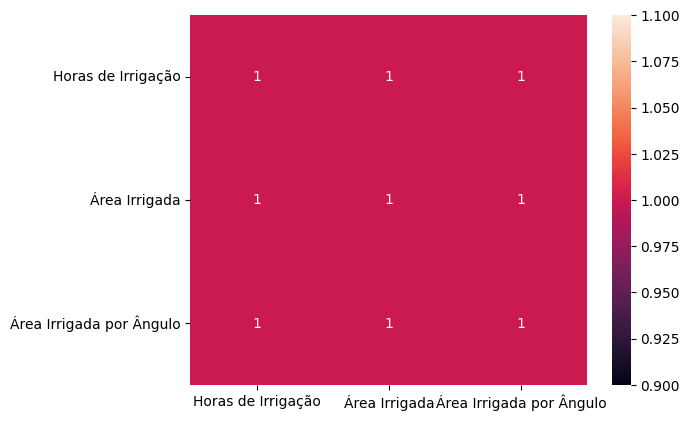

In [9]:
sns.heatmap(df_fazenda.corr('spearman'), annot=True)


### Treinamento do Modelo

In [11]:
#dividir os dados em Variavel independente e dpeendente e depois separar os conjuntos de treino e teste
# so ressaltando para mim mesmo, o uso do reshape ou [[]] é para quando eu tiver passando apenas uma coluna, no caso da variavel dependente (y) ele nao é necessariamente necessario porem como vai fazer uso de predict entao é necessario
X = df_fazenda[['Horas de Irrigação']]
y = df_fazenda[['Área Irrigada por Ângulo']]
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.4,random_state=50)




In [14]:
#Criando o modelo
reg_model = LinearRegression()

In [18]:
#treinando o modelo
reg_model.fit(X_train, y_train)

LinearRegression()

In [22]:
reg_model.coef_

array([[66.66666667]])

In [23]:
reg_model.intercept_

array([0.])

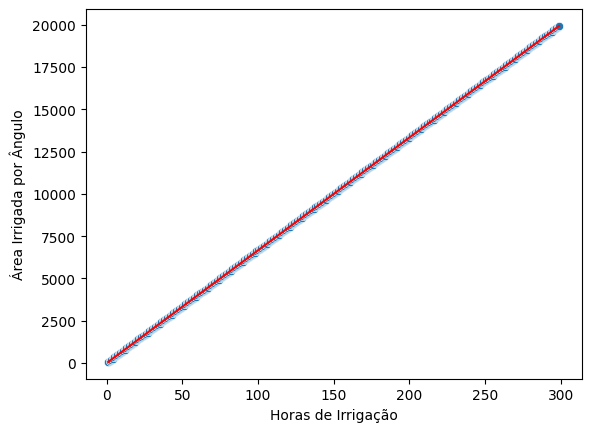

In [25]:
sns.scatterplot(data=df_fazenda, x='Horas de Irrigação', y='Área Irrigada por Ângulo')
plt.plot(df_fazenda['Horas de Irrigação'], reg_model.predict(df_fazenda[['Horas de Irrigação']]), color='red')

### Validar Modelo 

In [26]:
#Fazer uma predição com base no conjunto de testes

y_pred = reg_model.predict(X_test)

In [27]:
from sklearn.metrics import r2_score, mean_absolute_error,mean_squared_error

In [28]:
r2_score(y_test, y_pred)

1.0

In [29]:
# Calcular metrica MAE mean absolute error
# MAE = media (y_test - y_pred)
# É uma metrica facil de interpetar, MAE é menos sensivel a outliers
mean_absolute_error(y_test, y_pred)

1.5524569284429566e-12

In [30]:
# Calcular metrica MSE (mean squared error)
#MSE = media (y_test - y_pred)^2
#nao é uma metrica facil de interpretar
# é uma metrica mais sensivel a outliers e penaliza grandes erros
mean_squared_error(y_test, y_pred)

3.847924656148777e-24

In [31]:
# evitar error do mean_squared_error com squared false
from sklearn.metrics import root_mean_squared_error

In [32]:
#Calcular metrica RMSE (square root mean squared error)
#RMSE = media  (raiz (y_test - y_pred)^2)
#É uma metrica mais facil de interpretar
# mas ainda sim continua mais sensivel aos outliers
root_mean_squared_error(y_test,y_pred)

1.9616127691643875e-12

In [38]:
x_axis = range(len(y_test))


<function matplotlib.pyplot.show(close=None, block=None)>

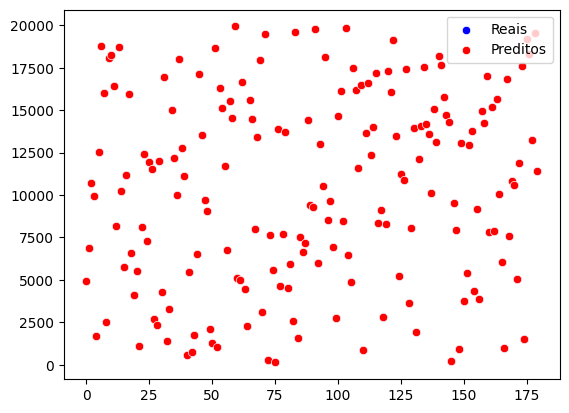

In [41]:
plt.Figure(figsize=(10,6))
sns.scatterplot(x=x_axis, y=y_test.values.reshape(-1), color='blue', label='Reais')

sns.scatterplot(x=x_axis, y=y_pred.reshape(-1), color='red', label='Preditos')

plt.legend()
plt.show

In [42]:
import numpy as np

In [43]:
# Métricas de desempenho
mse = np.mean((y_test - y_pred)**2)
mae = np.mean(np.abs(y_test - y_pred))
print(f"MSE: {mse}")
print(f"MAE: {mae}")

MSE: 3.847924656148777e-24
MAE: 1.5524569284429566e-12


In [ ]:
#Fazendo a predição pedida de exemplo
reg_model.predict([[15]])

c:\Users\dccas\.virtualenvs\Desafio_-_Regressão_Linear-Vg0eMxtD\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[1000.]])